In [91]:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## systematic test 

In [92]:
import numpy as np

In [93]:
from run_systematics import sys_iteration, fitting_SP, sys_ngal, weightmultiply, fitting_allSP, calling_sysMap, maskingCatalogSP

In [175]:
rootdir = '../output/sfd_train_photo_SamPle_full2/'
inputdir = rootdir
figoutdir = inputdir+'/figure/'
sysoutdir = inputdir+'/sys/'
wdir = sysoutdir+'/weights/'
os.system('mkdir '+inputdir)
os.system('mkdir '+figoutdir)
os.system('mkdir '+sysoutdir)
os.system('mkdir '+wdir)
#os.system('cp ../data_txt/systematics/4th/systematic*_no_weight.txt '+inputdir+'/.')

256

In [94]:
# calling map 
GoldMask = callingEliGoldMask()
#GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_st82 = GoldMask[ GoldMask['DEC'] > -3.0 ]
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]
#GoldMask_spt = cutcat20(GoldMask_spt)
#GoldMask_spt = Cuts.SpatialCuts(GoldMask_spt, ra=0, ra2 = 100, dec=-52, dec2 = -48)

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

In [95]:
# import DMASS

dmass = fitsio.read(rootdir+'dmass_spt_0001.fits')
#dmass = cutcat20(dmass)
dmass_st82 = fitsio.read(rootdir+'dmass_st82_0001.fits')
cmass = fitsio.read(rootdir+'train_sample_des.fits')
print 'dmass sample size :', dmass.size
print 'dmass st82 sample size :', dmass_st82.size
print 'cmass sample size :', cmass.size

dmass sample size : 113084
dmass st82 sample size : 12549
cmass sample size : 12641


In [96]:
#rand_bg = uniform_random_on_sphere(dmass_spt2, size = 100 * dmass_spt2.size)
#rand_bg = Cuts.keepGoodRegion(rand_bg)
#rand_bg_train = uniform_random_on_sphere(clean_cmass_data_des, size = 100 * clean_cmass_data_des.size)
#rand_bg_train = Cuts.keepGoodRegion(rand_bg_train)

rand = uniform_random_on_sphere(dmass, size = 10 * dmass.size)
rand = Cuts.keepGoodRegion(rand)
#rand = Cuts.keepY1GoldRegion(rand)
rand = rand[ rand['DEC'] < -3.0 ]
#rand = cutcat20(rand)

rand2 = uniform_random_on_sphere(dmass, size = 50 * dmass.size)
rand2 = Cuts.keepGoodRegion(rand2)
#rand = Cuts.keepY1GoldRegion(rand)
rand2 = rand2[ rand2['DEC'] < -3.0 ]
#rand2 = cutcat20(rand2)

rand_cmass = uniform_random_on_sphere(cmass, size = 200 * cmass.size)
rand_cmass = Cuts.keepGoodRegion(rand_cmass)
rand_cmass = rand_cmass[ rand_cmass['DEC'] > -3.0 ]

rand2_cmass = uniform_random_on_sphere(cmass, size = 500 * cmass.size)
rand2_cmass = Cuts.keepGoodRegion(rand2_cmass)
rand2_cmass = rand2_cmass[ rand2_cmass['DEC'] > -3.0 ]

print rand.size, dmass.size
print rand_cmass.size, cmass.size
#rand_train = uniform_random_on_sphere(clean_cmass_data_des, size = 10 * clean_cmass_data_des.size)
#rand_train = Cuts.keepGoodRegion(rand_train)

226825 113084
204892 12641


In [101]:
kind = 'SPT'
FullArea = SPTMaparea
#properties = ['DEPTH','EXPTIME']
#properties = ['DEPTH', 'EXPTIME', 'AIRMASS', 'SKYBRITE', 'FWHM', 'NSTARS']
properties = ['DEPTH', 'EXPTIME', 'AIRMASS', 'SKYBRITE', 'FWHM']
#properties = ['FWHM']
suffix='no_weight'
# calculating galaxy density and weights iterately

In [18]:
sysMap = calling_sysMap( properties=properties, kind='SPT', nside=4096 )


PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_g_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_r_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_i_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_z_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_g_nside4096_oversamp4_EXPTIME__total.fits.gz

In [54]:
sysMap_nstar = calling_sysMap( properties=['NSTARS_allband'], kind='SPT', nside=4096 )
sysMap_ge = calling_sysMap( properties=['GE'], kind='SPT', nside=4096 )


PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
y1a1_gold_1.0.2_stars_nside1024.fits
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
DOWNGRADE =  1024


In [19]:
sysMap_st82 = calling_sysMap( properties=['GE'], kind='STRIPE82', nside=4096 )

In [97]:
dmass_masked = maskingCatalogSP(catalog=dmass, sysMap=sysMap)
rand_masked = maskingCatalogSP(catalog=rand, sysMap=sysMap)
rand2_masked = maskingCatalogSP(catalog=rand2, sysMap=sysMap)

113084 108853
mask  0.9625853347953733
226825 219570
mask  0.9680149895293728
1132337 1096617
mask  0.9684546208416752


In [99]:
sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap, 
         FullArea = SPTMaparea, properties = properties, kind='SPT', nbins =15, 
         reweight= None, nside = 4096,
         suffix='no_weight', outdir=sysoutdir)

saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_g_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_r_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_i_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_z_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_AIRMASS_g_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_AIRMASS_r_SPT_no_weight.txt
saving data to  ..

KeyError: 'sys_NSTARS_allband_g_SPT'

In [102]:
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap, 
         FullArea = SPTMaparea, properties = properties, kind='SPT', nbins =15, 
         reweight= None, nside = 4096,
         suffix='vetoed', outdir=sysoutdir)

saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_r_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_i_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_z_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_AIRMASS_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_AIRMASS_r_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle

In [103]:
sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap_ge, 
         FullArea = SPTMaparea, properties = ['GE'], kind='SPT', nbins =15, 
         reweight= None, nside = 4096,
         suffix='no_weight', outdir=sysoutdir)
sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap_nstar, 
         FullArea = SPTMaparea, properties = ['NSTARS_allband'], kind='SPT', nbins =15, 
         reweight= None, nside = 4096,
         suffix='no_weight', outdir=sysoutdir)
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap_ge, 
         FullArea = SPTMaparea, properties = ['GE'], kind='SPT', nbins =15, 
         reweight= None, nside = 4096,
         suffix='vetoed', outdir=sysoutdir)
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap_nstar, 
         FullArea = SPTMaparea, properties = ['NSTARS_allband'], kind='SPT', nbins =15, 
         reweight= None, nside = 4096,
         suffix='vetoed', outdir=sysoutdir)

saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_GE_g_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_NSTARS_allband_g_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_GE_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_NSTARS_allband_g_SPT_vetoed.txt


saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/systematic_DEPTH_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/systematic_EXPTIME_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/systematic_AIRMASS_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/systematic_SKYBRITE_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/systematic_FWHM_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/systematic_GE_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/systematic_NSTARS_allband_SPT_vetoed.png


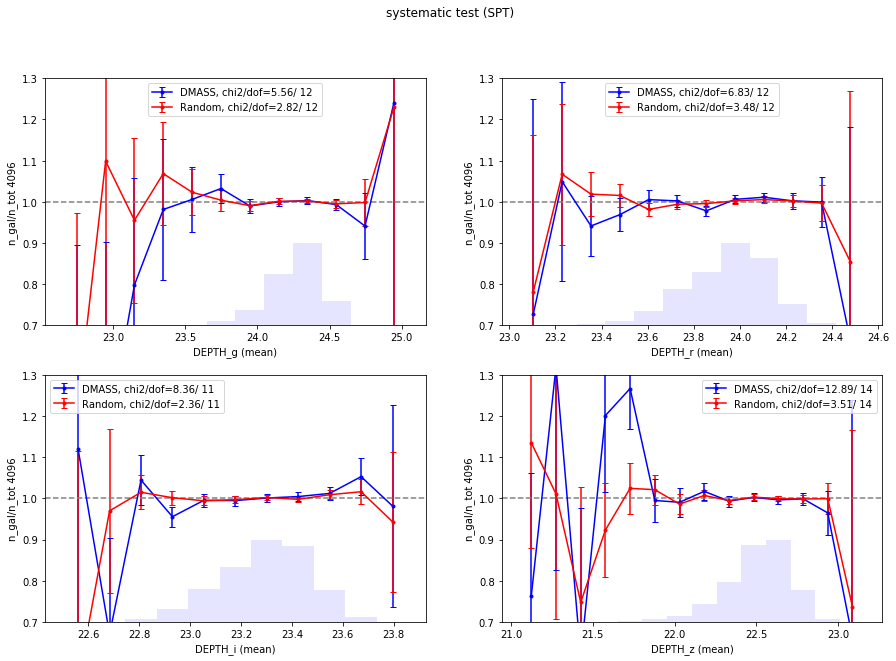

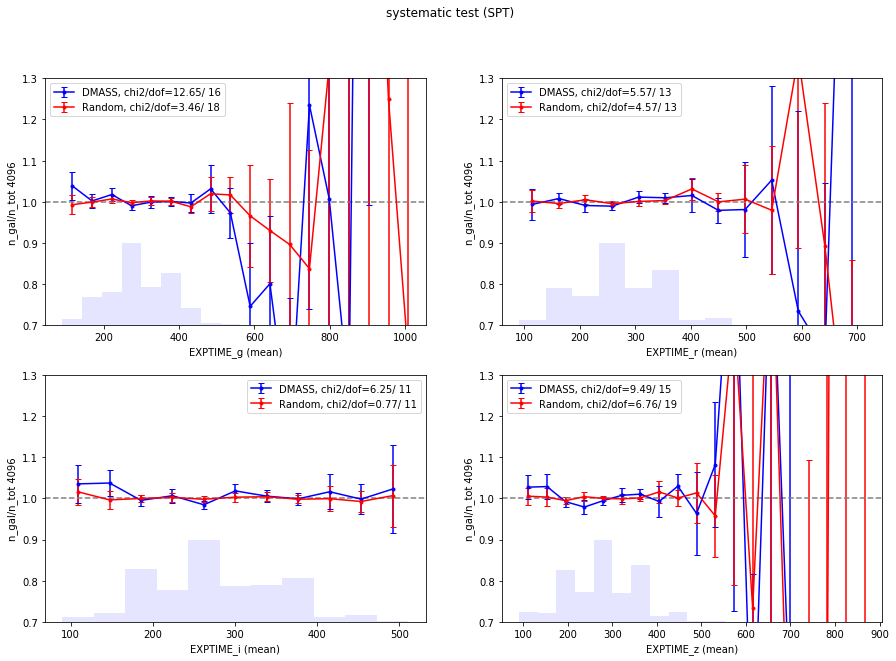

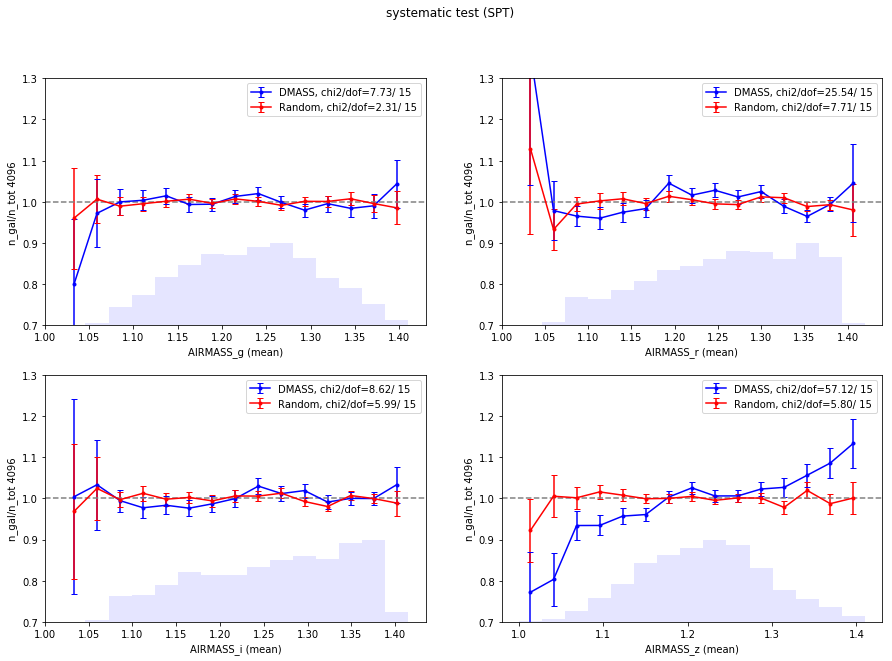

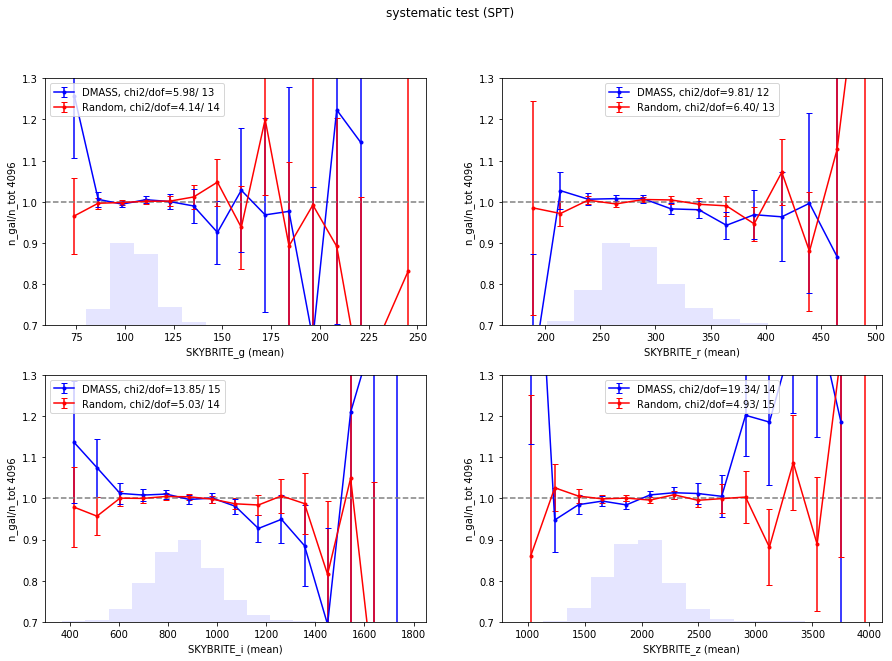

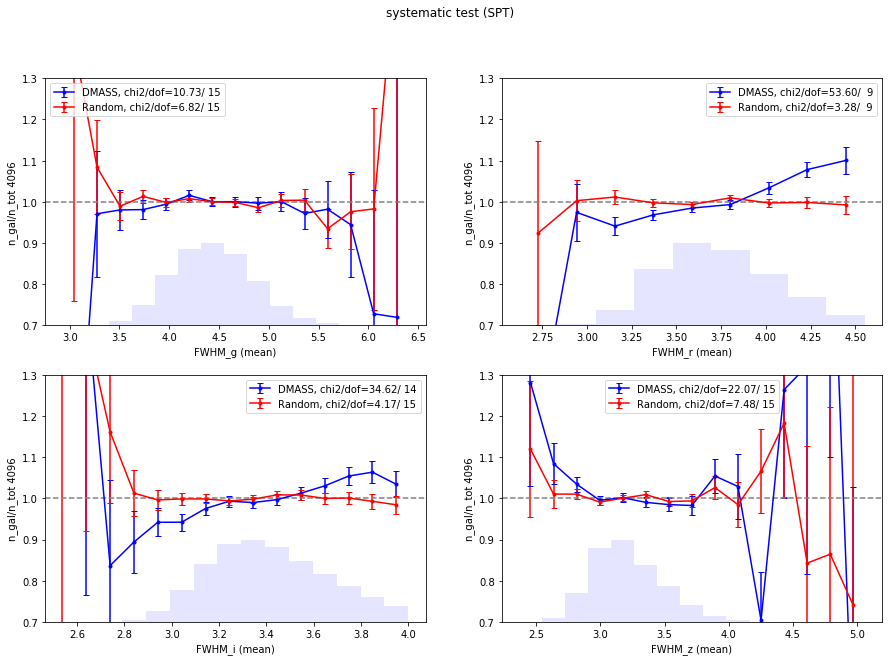

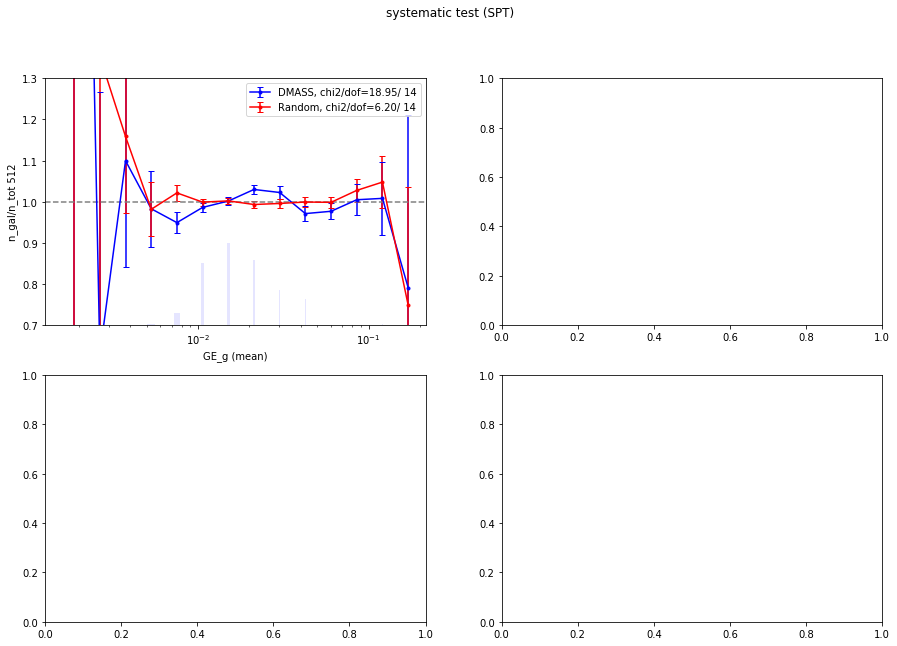

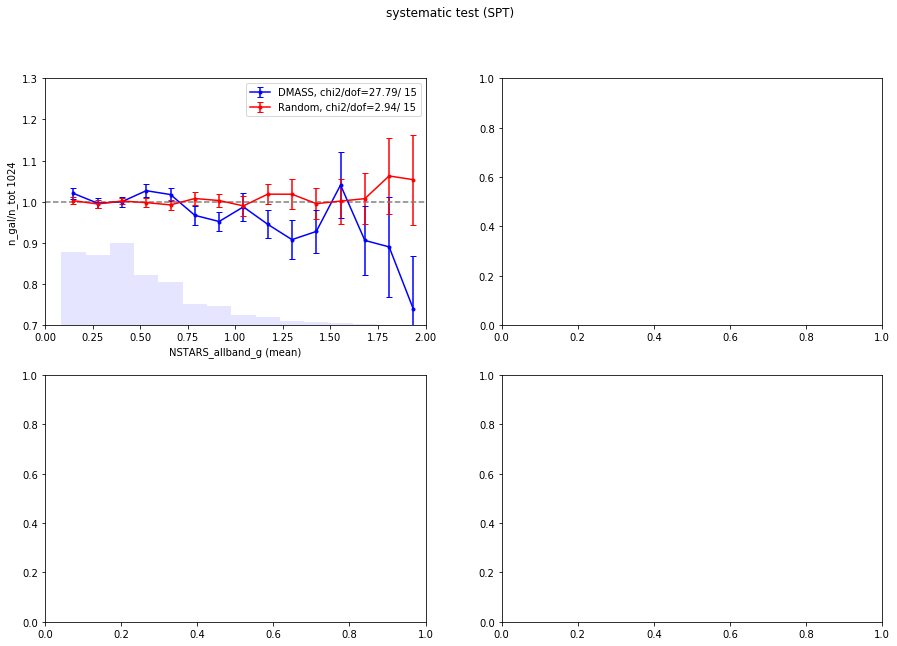

In [106]:
from systematics_module.contCorrection import doVisualization_ngal

#for p in properties+['GE', 'NSTARS_allband'] : 
#    doVisualization_ngal(property = p, nside = 4096, kind = kind, suffix='no_weight', \
#                         inputdir=sysoutdir, outdir=figoutdir)
for p in properties+['GE', 'NSTARS_allband'] : 
    doVisualization_ngal(property = p, nside = 4096, kind = kind, suffix='vetoed', \
                         inputdir=sysoutdir, outdir=figoutdir)

In [108]:
help(fitting_allSP)

Help on function fitting_allSP in module run_systematics:

fitting_allSP(suffix, properties=None, kind='SPT', inputdir=None, plot=True)



chi2_null =  5.55920267542731
chi2_mod. =  5.553962738844751
Delta chi2 (sample) = 0.005239936582558613
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_vetoed.txt.model

chi2_null =  6.834726878629036
chi2_mod. =  5.308251482194657
Delta chi2 (sample) = 1.5264753964343791
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_vetoed.txt.model

chi2_null =  8.36203412936399
chi2_mod. =  4.979169250473468
Delta chi2 (sample) = 3.382864878890521
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_vetoed.txt.model

chi2_null =  12.88789881591408
chi2_mod. =  11.937264256363232
Delta chi2 (sample) = 0.9506345595508474
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_vetoed.txt.model

saving fig to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_fitting_DEPTH_z_SPT_vetoed.png
chi2_null =  12.652732556287038
chi2_mod. =  11.347492044548517
Delta chi2 (sample)

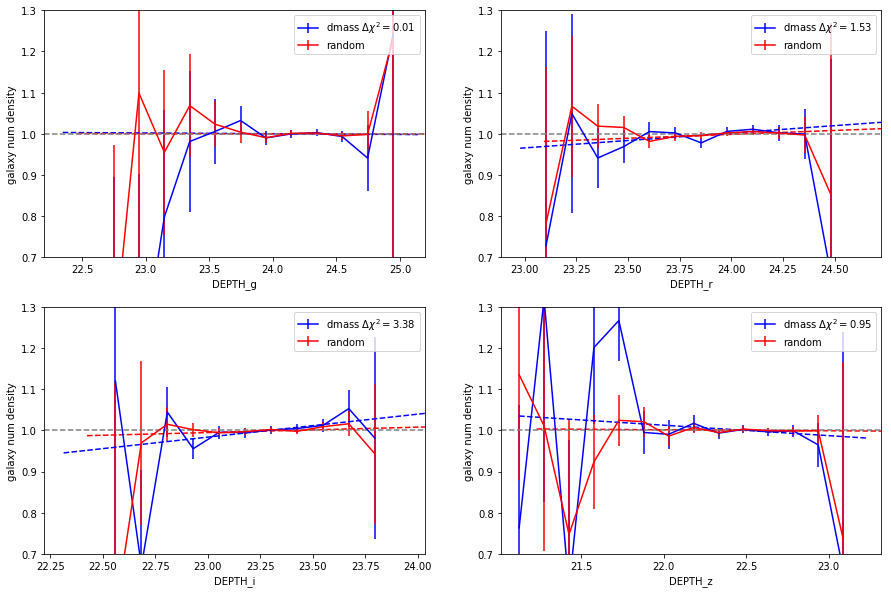

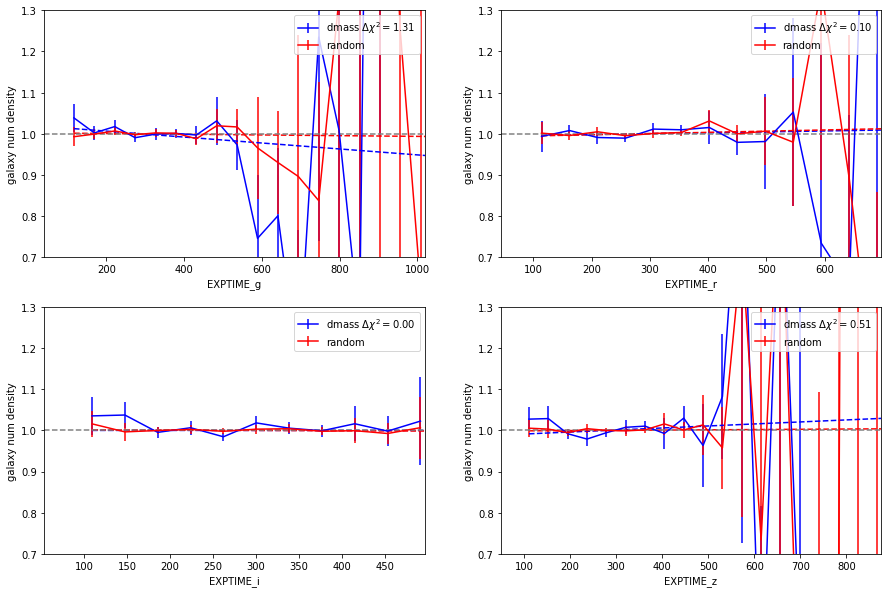

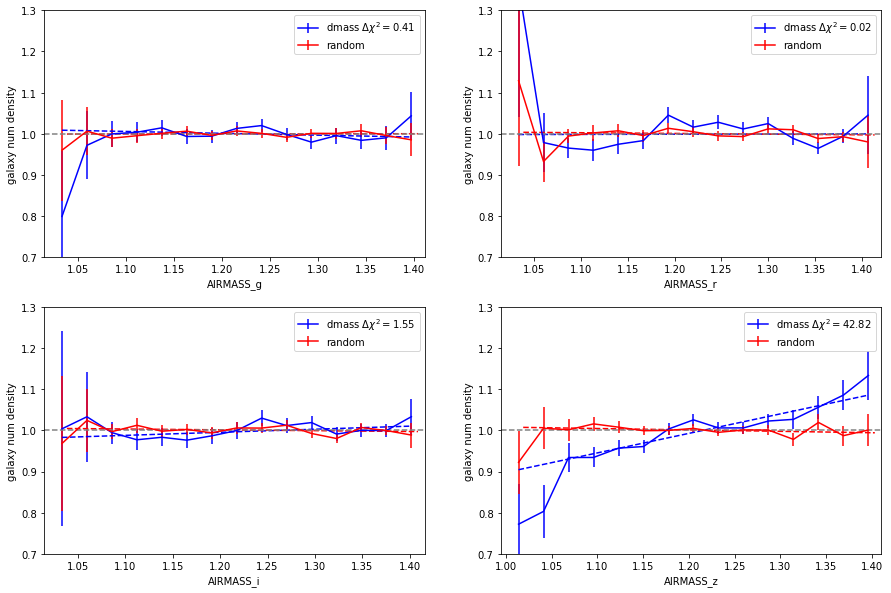

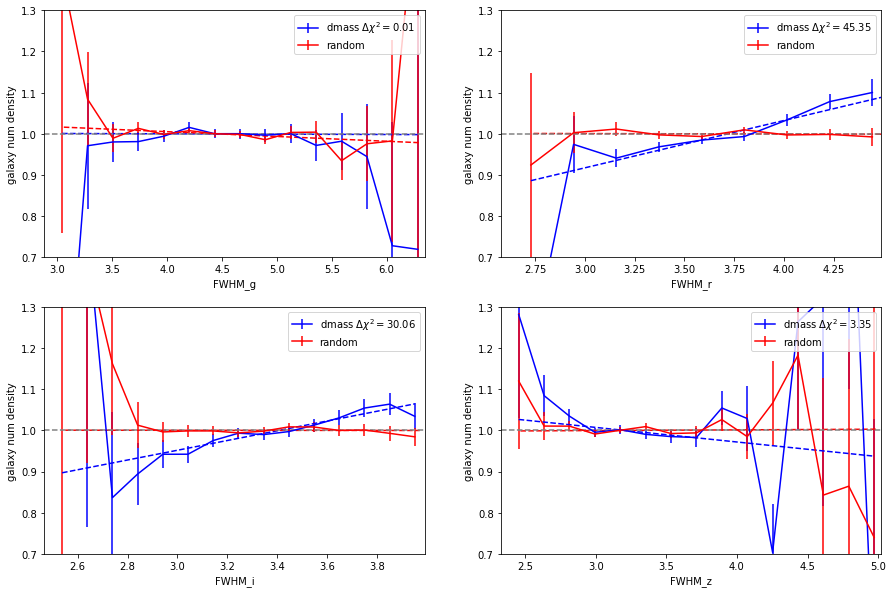

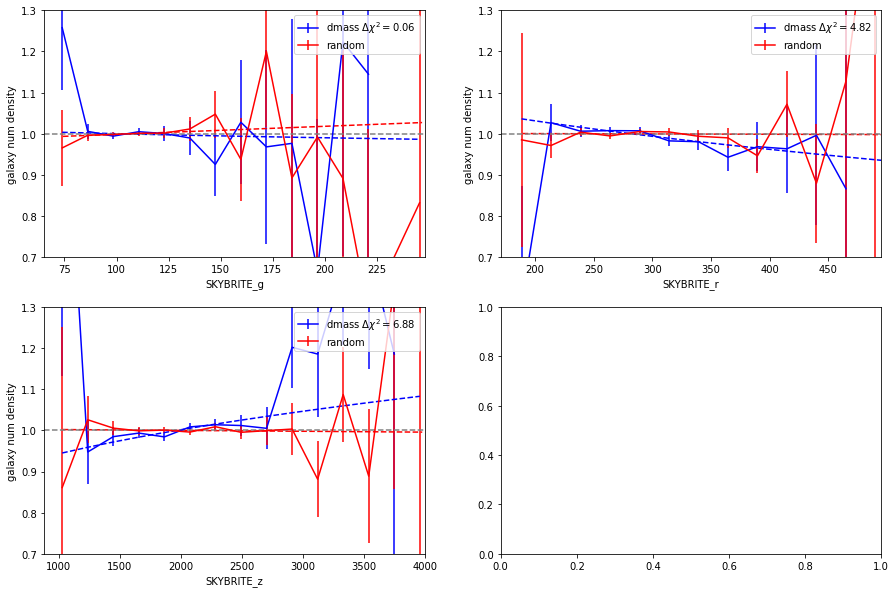

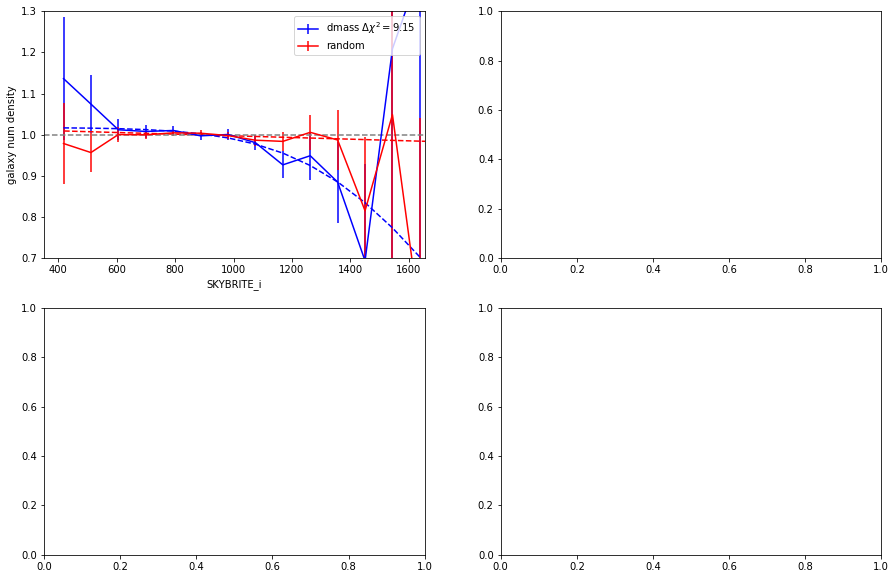

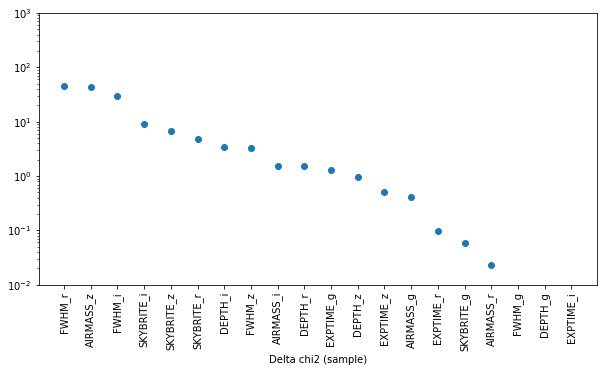

In [109]:
fitting_allSP( 'vetoed', properties = properties, inputdir = sysoutdir )
nextwname, nextw = plotting_significance( property = properties, filter=['g', 'r', 'i','z'], kind = 'SPT', 
                      suffix='vetoed', 
                path = sysoutdir, deltachi2=True)

# Correction ! 

### Galactic Extinction

In [110]:
weightDic = {}
weightDic['vetoed'] = np.ones(dmass_masked.size)
all_weight = weightmultiply(weightDic)
suffix = 'vetoed'
nextweight = nextwname[0]
print 'nextweight', nextweight

['vetoed']
vetoed
nextweight FWHM_r


In [111]:
suffix

'vetoed'

-------------------------
 iteration - 0
 nextweight FWHM_r
-------------------------
['vetoed']
vetoed
----------------------------------
initialize function  FWHM_r
linear


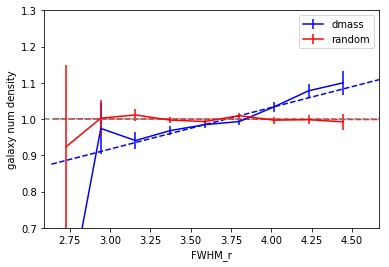

store weight  FWHM_r
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_fwhm_r_SPT.fits
suffix =  wg_fwhm_r
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_r_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_i_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_z_SPT_wg_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_AIRMASS_g_SP

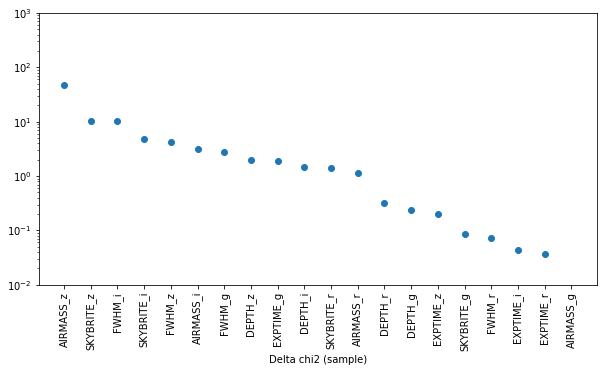

-------------------------
 iteration - 1
 nextweight AIRMASS_z
-------------------------
['vetoed', 'FWHM_r']
vetoed
FWHM_r
----------------------------------
initialize function  AIRMASS_z
linear


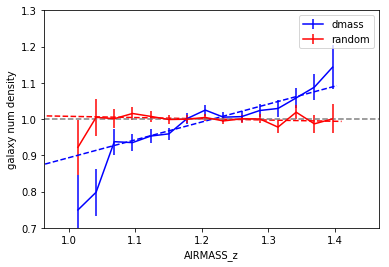

store weight  AIRMASS_z
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_airmass_z_SPT.fits
suffix =  wg_fwhm_r_airmass_z
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_r_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_i_SPT_wg_fwhm_r_airmass_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_z_SPT_wg_fwhm_r_a

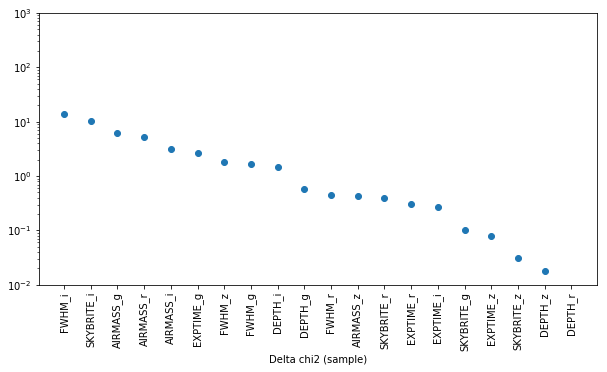

-------------------------
 iteration - 2
 nextweight FWHM_i
-------------------------
['vetoed', 'AIRMASS_z', 'FWHM_r']
vetoed
AIRMASS_z
FWHM_r
----------------------------------
initialize function  FWHM_i
linear


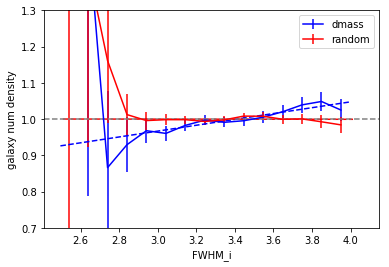

store weight  FWHM_i
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_fwhm_i_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_fwhm_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r_airmass_z_fwhm_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_r_SPT_wg_fwhm_r_airmass_z_fwhm_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_i_SPT_wg_fwhm_r_airmass_z_fwhm_i.txt
saving data to  ../output/sfd_train_photo_SamP

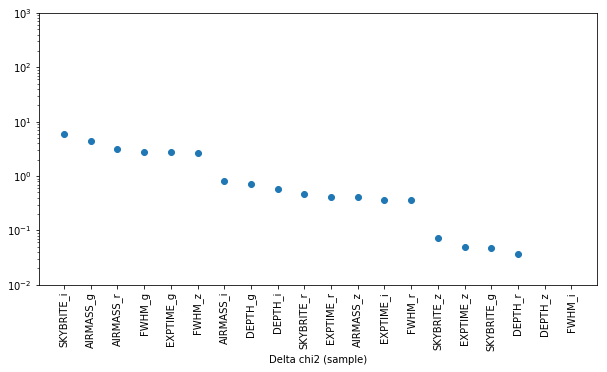

-------------------------
 iteration - 3
 nextweight SKYBRITE_i
-------------------------
['vetoed', 'AIRMASS_z', 'FWHM_i', 'FWHM_r']
vetoed
AIRMASS_z
FWHM_i
FWHM_r
----------------------------------
initialize function  SKYBRITE_i
errftn


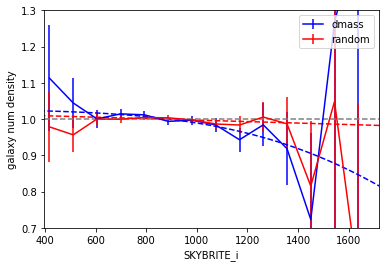

store weight  SKYBRITE_i
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_skybrite_i_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIM

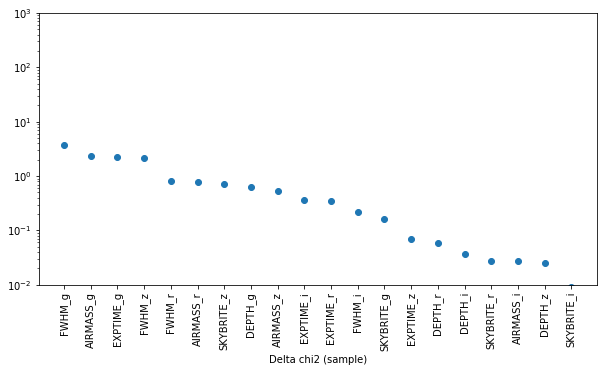

-------------------------
 iteration - 4
 nextweight FWHM_g
-------------------------
['vetoed', 'AIRMASS_z', 'SKYBRITE_i', 'FWHM_i', 'FWHM_r']
vetoed
AIRMASS_z
SKYBRITE_i
FWHM_i
FWHM_r
----------------------------------
initialize function  FWHM_g
linear


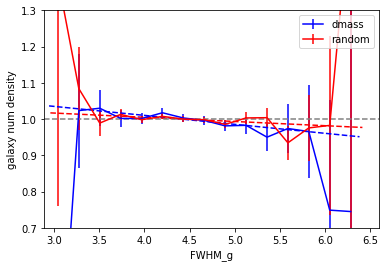

store weight  FWHM_g
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_fwhm_g_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g.txt
saving data to  ../output/sfd_train_

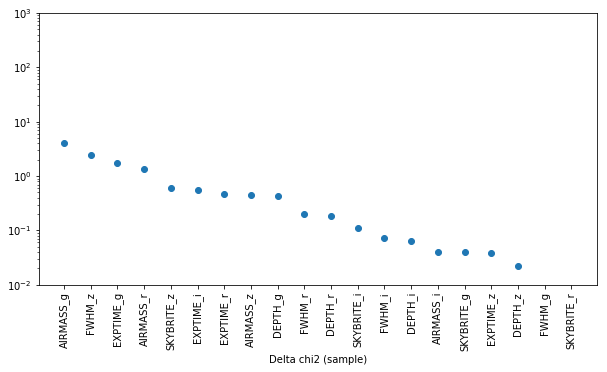

-------------------------
 iteration - 5
 nextweight AIRMASS_g
-------------------------
['vetoed', 'FWHM_g', 'AIRMASS_z', 'FWHM_r', 'SKYBRITE_i', 'FWHM_i']
vetoed
FWHM_g
AIRMASS_z
FWHM_r
SKYBRITE_i
FWHM_i
----------------------------------
initialize function  AIRMASS_g
linear


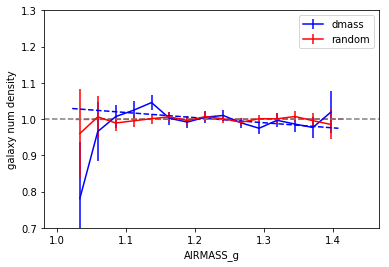

store weight  AIRMASS_g
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_airmass_g_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_r_SPT_wg_fwhm_r_airmass_z

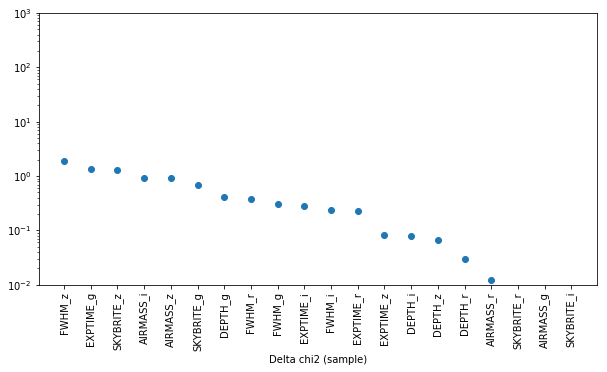

-------------------------
 iteration - 6
 nextweight FWHM_z
-------------------------
['vetoed', 'FWHM_g', 'AIRMASS_z', 'FWHM_r', 'AIRMASS_g', 'SKYBRITE_i', 'FWHM_i']
vetoed
FWHM_g
AIRMASS_z
FWHM_r
AIRMASS_g
SKYBRITE_i
FWHM_i
----------------------------------
initialize function  FWHM_z
linear


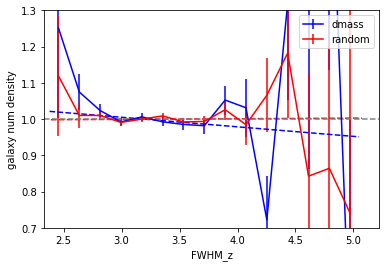

store weight  FWHM_z
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_fwhm_z_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systemat

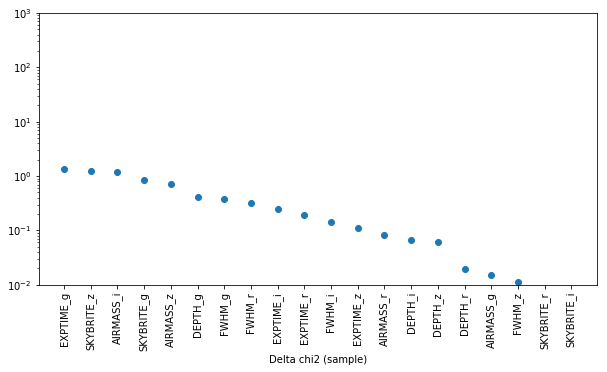

-------------------------
 iteration - 7
 nextweight EXPTIME_g
-------------------------
['vetoed', 'FWHM_g', 'AIRMASS_z', 'FWHM_r', 'AIRMASS_g', 'FWHM_z', 'SKYBRITE_i', 'FWHM_i']
vetoed
FWHM_g
AIRMASS_z
FWHM_r
AIRMASS_g
FWHM_z
SKYBRITE_i
FWHM_i
----------------------------------
initialize function  EXPTIME_g
linear


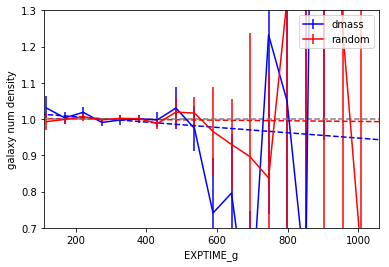

store weight  EXPTIME_g
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_exptime_g_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g.txt
sa

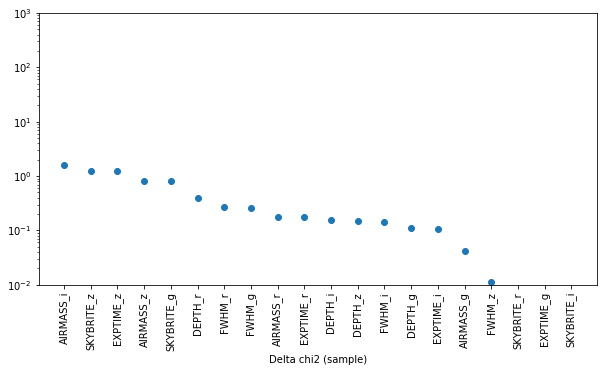

-------------------------
 iteration - 8
 nextweight AIRMASS_i
-------------------------
['vetoed', 'FWHM_g', 'AIRMASS_z', 'EXPTIME_g', 'FWHM_r', 'AIRMASS_g', 'FWHM_z', 'SKYBRITE_i', 'FWHM_i']
vetoed
FWHM_g
AIRMASS_z
EXPTIME_g
FWHM_r
AIRMASS_g
FWHM_z
SKYBRITE_i
FWHM_i
----------------------------------
initialize function  AIRMASS_i
linear


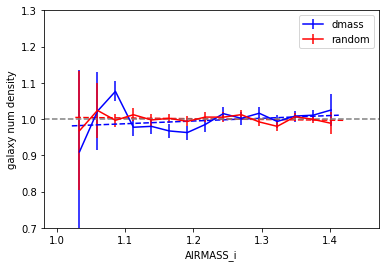

store weight  AIRMASS_i
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_airmass_i_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_EXPTIME_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_s

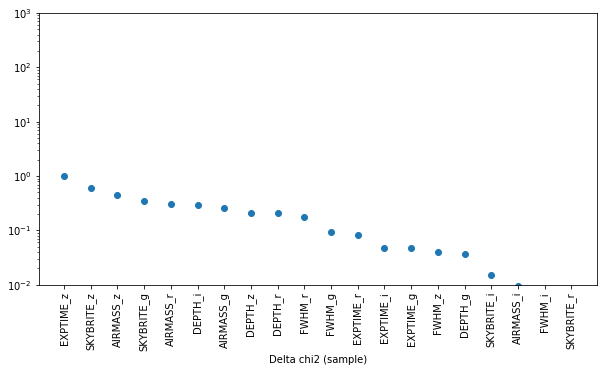

-------------------------
 iteration - 9
 nextweight EXPTIME_z
-------------------------
['vetoed', 'FWHM_g', 'AIRMASS_z', 'EXPTIME_g', 'FWHM_r', 'AIRMASS_g', 'FWHM_z', 'SKYBRITE_i', 'FWHM_i', 'AIRMASS_i']
vetoed
FWHM_g
AIRMASS_z
EXPTIME_g
FWHM_r
AIRMASS_g
FWHM_z
SKYBRITE_i
FWHM_i
AIRMASS_i
----------------------------------
initialize function  EXPTIME_z
linear


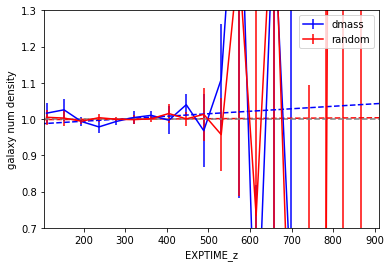

store weight  EXPTIME_z
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_exptime_z_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/sys

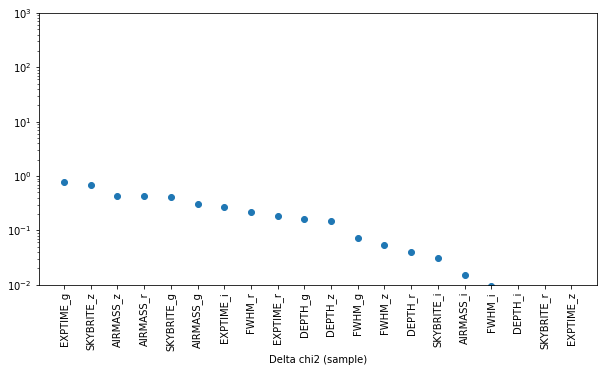

-------------------------
 iteration - 10
 nextweight SKYBRITE_z
-------------------------
['EXPTIME_z', 'vetoed', 'FWHM_g', 'AIRMASS_z', 'EXPTIME_g', 'FWHM_r', 'AIRMASS_g', 'FWHM_z', 'SKYBRITE_i', 'FWHM_i', 'AIRMASS_i']
EXPTIME_z
vetoed
FWHM_g
AIRMASS_z
EXPTIME_g
FWHM_r
AIRMASS_g
FWHM_z
SKYBRITE_i
FWHM_i
AIRMASS_i
----------------------------------
initialize function  SKYBRITE_z
linear


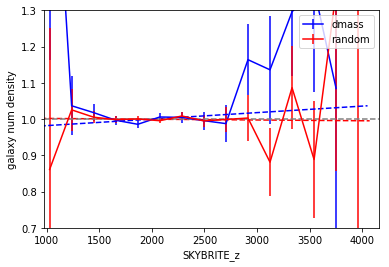

store weight  SKYBRITE_z
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_skybrite_z_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z.txt
saving

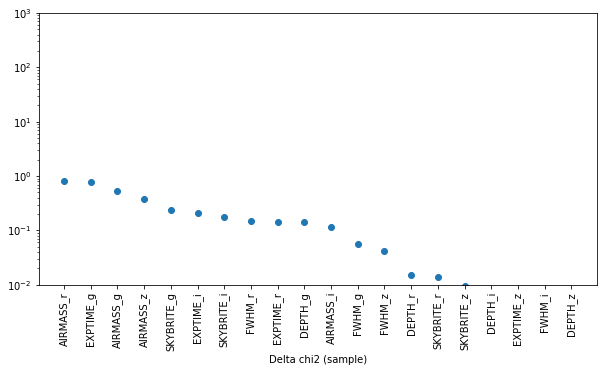

-------------------------
 iteration - 11
 nextweight AIRMASS_r
-------------------------
['EXPTIME_z', 'vetoed', 'FWHM_g', 'SKYBRITE_z', 'AIRMASS_z', 'EXPTIME_g', 'FWHM_r', 'AIRMASS_g', 'FWHM_z', 'SKYBRITE_i', 'FWHM_i', 'AIRMASS_i']
EXPTIME_z
vetoed
FWHM_g
SKYBRITE_z
AIRMASS_z
EXPTIME_g
FWHM_r
AIRMASS_g
FWHM_z
SKYBRITE_i
FWHM_i
AIRMASS_i
----------------------------------
initialize function  AIRMASS_r
linear


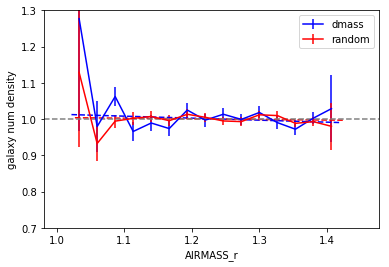

store weight  AIRMASS_r
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_airmass_r_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_air

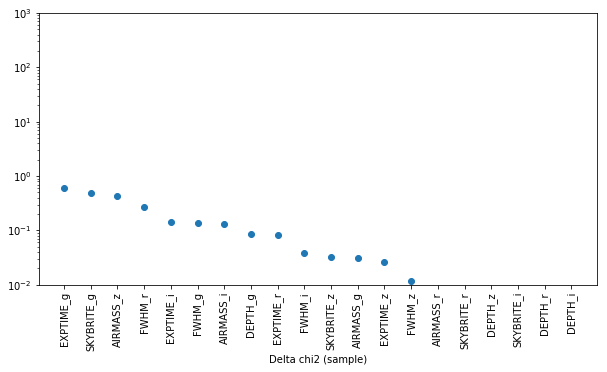

-------------------------
 iteration - 12
 nextweight SKYBRITE_g
-------------------------
['EXPTIME_z', 'vetoed', 'AIRMASS_r', 'FWHM_g', 'SKYBRITE_z', 'AIRMASS_z', 'EXPTIME_g', 'FWHM_r', 'AIRMASS_g', 'FWHM_z', 'SKYBRITE_i', 'FWHM_i', 'AIRMASS_i']
EXPTIME_z
vetoed
AIRMASS_r
FWHM_g
SKYBRITE_z
AIRMASS_z
EXPTIME_g
FWHM_r
AIRMASS_g
FWHM_z
SKYBRITE_i
FWHM_i
AIRMASS_i
----------------------------------
initialize function  SKYBRITE_g
linear


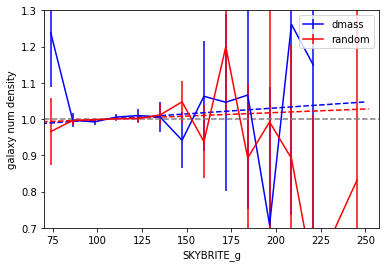

store weight  SKYBRITE_g
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_skybrite_g_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r_airmass_z_fwhm_i_sk

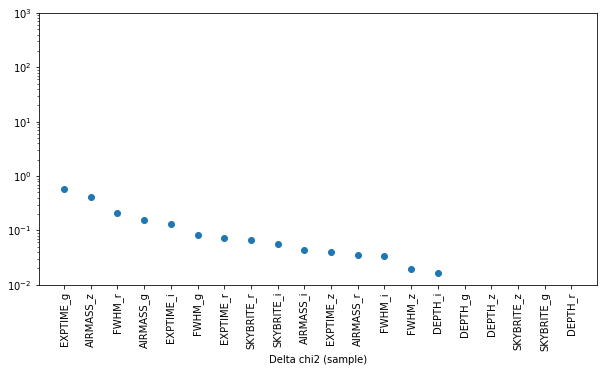

-------------------------
 iteration - 13
 nextweight FWHM_r
-------------------------
['EXPTIME_z', 'vetoed', 'AIRMASS_r', 'FWHM_g', 'SKYBRITE_z', 'AIRMASS_z', 'EXPTIME_g', 'FWHM_r', 'SKYBRITE_g', 'AIRMASS_g', 'FWHM_z', 'SKYBRITE_i', 'FWHM_i', 'AIRMASS_i']
EXPTIME_z
vetoed
AIRMASS_r
FWHM_g
SKYBRITE_z
AIRMASS_z
EXPTIME_g
FWHM_r
SKYBRITE_g
AIRMASS_g
FWHM_z
SKYBRITE_i
FWHM_i
AIRMASS_i
----------------------------------
initialize function  FWHM_r
linear


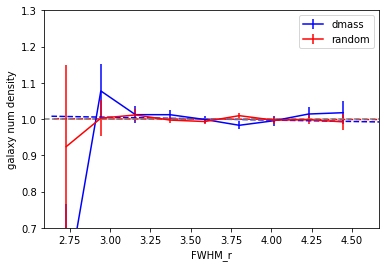

store weight  FWHM_r
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_fwhm_r_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_z_SPT_wg_fwhm_r

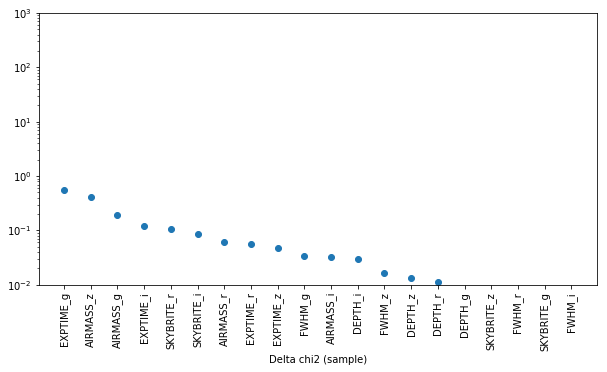

-------------------------
 iteration - 14
 nextweight EXPTIME_i
-------------------------
['EXPTIME_z', 'vetoed', 'AIRMASS_r', 'FWHM_g', 'SKYBRITE_z', 'AIRMASS_z', 'EXPTIME_g', 'FWHM_r', 'SKYBRITE_g', 'AIRMASS_g', 'FWHM_z', 'SKYBRITE_i', 'FWHM_i', 'AIRMASS_i']
EXPTIME_z
vetoed
AIRMASS_r
FWHM_g
SKYBRITE_z
AIRMASS_z
EXPTIME_g
FWHM_r
SKYBRITE_g
AIRMASS_g
FWHM_z
SKYBRITE_i
FWHM_i
AIRMASS_i
----------------------------------
initialize function  EXPTIME_i
linear


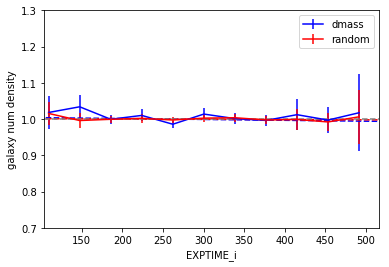

store weight  EXPTIME_i
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_exptime_i_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r_exptime_i
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r_exptime_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r_exptime_i.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r_exptime_i.txt
saving data to  ../output/sfd_train_photo_SamP

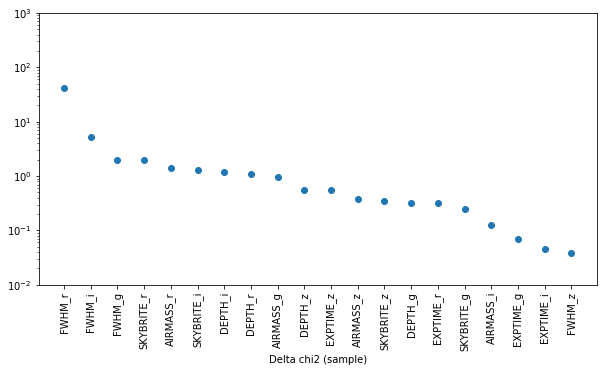

-------------------------
 iteration - 15
 nextweight SKYBRITE_r
-------------------------
['EXPTIME_z', 'vetoed', 'AIRMASS_r', 'FWHM_g', 'SKYBRITE_z', 'AIRMASS_z', 'EXPTIME_g', 'FWHM_r', 'EXPTIME_i', 'SKYBRITE_g', 'AIRMASS_g', 'FWHM_z', 'SKYBRITE_i', 'FWHM_i', 'AIRMASS_i']
EXPTIME_z
vetoed
AIRMASS_r
FWHM_g
SKYBRITE_z
AIRMASS_z
EXPTIME_g
FWHM_r
EXPTIME_i
SKYBRITE_g
AIRMASS_g
FWHM_z
SKYBRITE_i
FWHM_i
AIRMASS_i
----------------------------------
initialize function  SKYBRITE_r
linear


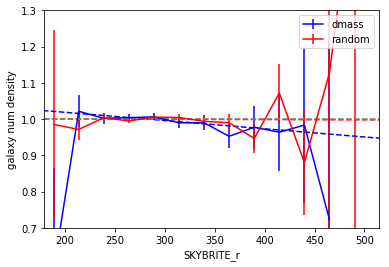

store weight  SKYBRITE_r
save weight to fits ../output/sfd_train_photo_SamPle_full2//sys//weights/wg_skybrite_r_SPT.fits
suffix =  wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r_exptime_i_skybrite_r
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r_exptime_i_skybrite_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r_exptime_i_skybrite_r.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g_fwhm_r_exptime_i_skybrite_r.txt


KeyboardInterrupt: 

In [112]:
applied_weight = []
for ii in range(21):
    
    #nextweight = 'AIRMASS_g'
    print '-------------------------'
    print ' iteration -', ii
    print ' nextweight', nextweight
    print '-------------------------'
    #if ii < 7 : pp = []
    #else : pp = properties
    all_weight = weightmultiply(weightDic)
    function = 'linear'
    if nextweight == 'SKYBRITE_i': function = 'errftn'
    sys_iteration( nextweight=nextweight, suffix=suffix, all_weight = all_weight, 
                      cat1=dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2=rand2_masked,
                      sysMap = sysMap, nside=4096, kind='SPT', function=function, function2 = None,
                      properties = properties, filters=['g', 'r', 'i', 'z'],
                      path=sysoutdir, plot=True, weightDic=weightDic, FullArea=SPTMaparea )

    if suffix == 'vetoed': suffix = 'wg_'+nextweight.lower()
    else : suffix = suffix+'_'+nextweight.lower()
        
    fitting_allSP( suffix, properties = properties, inputdir = sysoutdir, plot=False )
    nextwname, nextw = plotting_significance( property = properties, filter=['g', 'r', 'i','z'], kind = kind, 
                          suffix=suffix, 
                    path = sysoutdir, deltachi2=True)
    
    nextweight = nextwname[0]
    for i in range(1,len(nextwname)):
        if nextweight in applied_weight :
            nextweight = nextwname[i]
        else : break
    applied_weight.append(nextweight)



# Appling weights 

In [161]:
suf = 'wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g'
#suf = 'wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z'

orderlabel = suf.split('_')[1:]
order = []
for i in np.arange(0, len(orderlabel), 2):
    order.append( orderlabel[i]+'_'+orderlabel[i+1] )
print order

weightDic_re = {}
weightDic_re['vetoed'] = np.ones(dmass_masked.size)
for o in order : 
    weightDic_re[o] = fitsio.read(sysoutdir+'weights/wg_'+o+'_SPT.fits')
all_weight = weightmultiply(weightDic_re)

['fwhm_r', 'airmass_z', 'fwhm_i', 'skybrite_i', 'fwhm_g', 'airmass_g', 'fwhm_z', 'exptime_g', 'airmass_i', 'exptime_z', 'skybrite_z', 'airmass_r', 'skybrite_g']
['airmass_i', 'vetoed', 'airmass_r', 'fwhm_g', 'skybrite_z', 'airmass_z', 'exptime_g', 'fwhm_r', 'exptime_z', 'skybrite_g', 'airmass_g', 'fwhm_z', 'skybrite_i', 'fwhm_i']
airmass_i
vetoed
airmass_r
fwhm_g
skybrite_z
airmass_z
exptime_g
fwhm_r
exptime_z
skybrite_g
airmass_g
fwhm_z
skybrite_i
fwhm_i


In [167]:
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap_nstar, 
         FullArea = SPTMaparea, properties = ['NSTARS_allband'], kind='SPT', nbins =10, 
         reweight= None, nside = 4096,
         suffix='vetoed', outdir=sysoutdir)

saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_NSTARS_allband_g_SPT_vetoed.txt


In [166]:
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap_ge, 
         FullArea = SPTMaparea, properties = ['GE'], kind='SPT', nbins =15, 
         reweight= all_weight, nside = 4096,
         suffix=suf, outdir=sysoutdir)
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap_nstar, 
         FullArea = SPTMaparea, properties = ['NSTARS_allband'], kind='SPT', nbins =10, 
         reweight= all_weight, nside = 4096,
         suffix=suf, outdir=sysoutdir)

saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_GE_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.txt
saving data to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_NSTARS_allband_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.txt


In [168]:
fitting_allSP( suf, properties = properties+['GE', 'NSTARS_allband'], inputdir = sysoutdir, plot=False )
fitting_allSP( 'vetoed', properties = properties+['GE', 'NSTARS_allband'], inputdir = sysoutdir, plot=False )

chi2_null =  5.184319137533481
chi2_mod. =  5.176247980392998
Delta chi2 (sample) = 0.00807115714048301
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.txt.model

chi2_null =  5.791050338203899
chi2_mod. =  5.78692606444315
Delta chi2 (sample) = 0.0041242737607491975
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.txt.model

chi2_null =  4.155973381359242
chi2_mod. =  4.1392001267785155
Delta chi2 (sample) = 0.01677325458072687
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.txt.model

chi2_null =  8.717157973832169
c

chi2_null =  22.074388738166775
chi2_mod. =  18.727253245111356
Delta chi2 (sample) = 3.3471354930554185
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_FWHM_z_SPT_vetoed.txt.model

chi2_null =  5.978202057500712
chi2_mod. =  5.918219445853556
Delta chi2 (sample) = 0.05998261164715579
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_SKYBRITE_g_SPT_vetoed.txt.model

chi2_null =  9.811125361307814
chi2_mod. =  4.991807146434731
Delta chi2 (sample) = 4.819318214873084
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_SKYBRITE_r_SPT_vetoed.txt.model

chi2_null =  19.337873111345885
chi2_mod. =  12.457791310325685
Delta chi2 (sample) = 6.8800818010202
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_SKYBRITE_z_SPT_vetoed.txt.model

chi2_null =  13.851355035733357
chi2_mod. =  4.697167476734482
Delta chi2 (sample) = 9.154187558998874
output save to  ../output/sfd_train_photo_SamPle_full2//sys/systematic_S

----------------------------------
initialize function  DEPTH_g
linear


KeyError: 'sys_DEPTH_g_SPT'

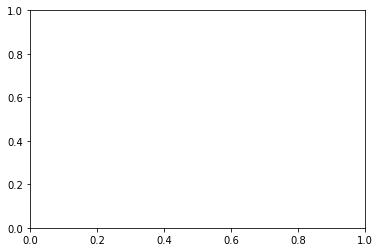

In [74]:

"""
sys_iteration( nextweight=nextweight, suffix=suffix, all_weight = all_weight, 
                  cat1=dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2=rand2_masked,
                  sysMap = sysMap_nstar, nside=4096, kind='SPT', function=function, function2 = None,
                  properties = properties, filters=['g', 'r', 'i', 'z'],
                  path=sysoutdir, plot=True, weightDic=weightDic, FullArea=SPTMaparea )

if suffix == 'vetoed': suffix = 'wg_'+nextweight.lower()
else : suffix = suffix+'_'+nextweight.lower()

fitting_allSP( suffix, properties = properties[:-2], inputdir = sysoutdir, plot=False )
nextwname, nextw = plotting_significance( property = properties, filter=['g', 'r', 'i','z'], kind = kind, 
                      suffix=suffix, 
                path = sysoutdir, deltachi2=True)
                
"""

[45.34759660767577, 42.824978723803476, 30.05776063846953, 9.154187558998874, 6.8800818010202, 4.819318214873084, 3.382864878890521, 3.3471354930554185, 1.5484510225755646, 1.5264753964343791, 1.3052405117385213, 0.9506345595508474, 0.5080746808254784, 0.40987337851154937, 0.21407189494034995, 0.09811503386584253, 0.05998261164715579, 0.02296018340919659, 0.0073711755143222035, 0.005239936582558613, 0.001101932494088409]


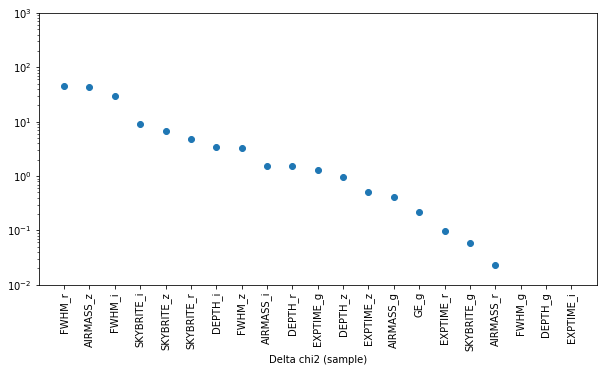

[0.5835659286610042, 0.5049419881734458, 0.41257839085916004, 0.210850963887399, 0.15705711484261187, 0.12933187251514155, 0.08362328361182847, 0.07387523764366222, 0.06570430826335683, 0.05734610001782503, 0.04396464318879367, 0.03976550072091278, 0.0350915320989067, 0.03370041172952298, 0.01978025559991181, 0.01677325458072687, 0.00807115714048301, 0.007819239314589055, 0.007148452213311174, 0.005344140761811111, 0.0041242737607491975]


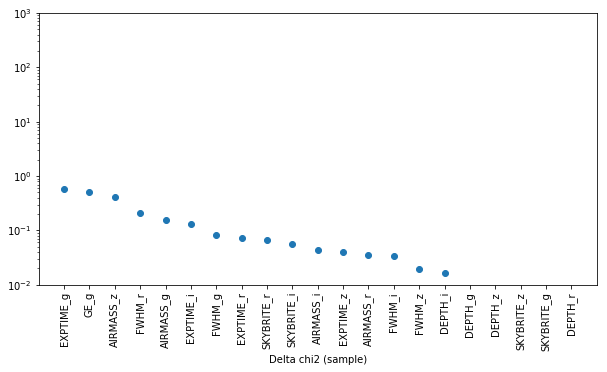

In [189]:
label_no_weight, values_no_weight = plotting_significance( property = properties+['GE'], filter=filters, kind = kind, suffix='vetoed', 
                    path = sysoutdir, deltachi2=True)
label_full_weight, values_full_weight = plotting_significance( property = properties+['GE'], filter=filters, kind = kind, suffix=suf, 
                    path = sysoutdir, deltachi2=True)
#label_full_weight2, values_full_weight2 = plotting_significance( property = properties, filter=filters, kind = kind, suffix=suf2, 
#                    path = inputdir, deltachi2=True)

0

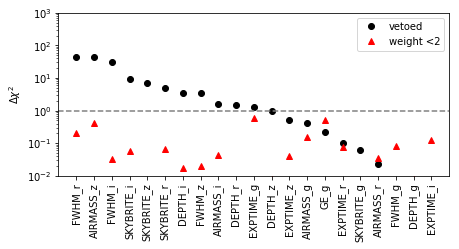

In [190]:

values_full_weight_reorder = []
for la in label_no_weight:
    for j in range(len(label_full_weight)):
        if la == label_full_weight[j]: 
            values_full_weight_reorder.append(values_full_weight[j])
            break
"""
values_full_weight_reorder2 = []
for la in label_no_weight:
    for j in range(len(label_full_weight2)):
        if la == label_full_weight2[j]: 
            values_full_weight_reorder2.append(values_full_weight2[j])
            break
"""           
values_full_weight_reorder = np.array(values_full_weight_reorder)
#values_full_weight_reorder2 = np.array(values_full_weight_reorder2)

fig, ax = plt.subplots(figsize = (7,3))

ax.plot( np.arange( len(values_no_weight) ), values_no_weight,  'ko' , label='vetoed'  )
ax.plot( np.arange( len(values_no_weight) ), values_full_weight_reorder, 'r^', label='weight <2'  )
#ax.plot( np.arange( len(values_no_weight) ), values_full_weight_reorder2, 'b^', label='weight <1'  )


#ax.plot( values_no_weight, np.arange( len(values_no_weight) ),  'ko'  )
#ax.plot( values_full_weight_reorder, np.arange( len(values_no_weight) ),  'ro'  )
#ax.axhline(y = 1, ls = '--', color='grey')
ax.axhline(y = 1, ls = '--', color='grey')
#ax.axhline(y = 1, ls = '--', color='grey')
ax.set_ylim(0.01,1000)
ax.set_ylabel(r'$\Delta \chi^2$')
ax.set_xticks( np.arange(len(values_no_weight)))
ax.set_xticklabels(label_no_weight, rotation = 90)
ax.set_yscale('log')
ax.legend(loc='best')

fig.savefig(inputdir+'comparison3_chisquare_'+suf+'.png')
0

saving fig to  ../data_txt/systematics/4th/figure/comparison_systematic_GE_SPT_wg_fwhm_r_airmass_z_airmass_i_skybrite_i_skybrite_r_airmass_r_airmass_g_nstars_allband_g_depth_i_exptime_g_fwhm_g_fwhm_z_exptime_z_depth_r_fwhm_i_exptime_i_depth_g.png


0

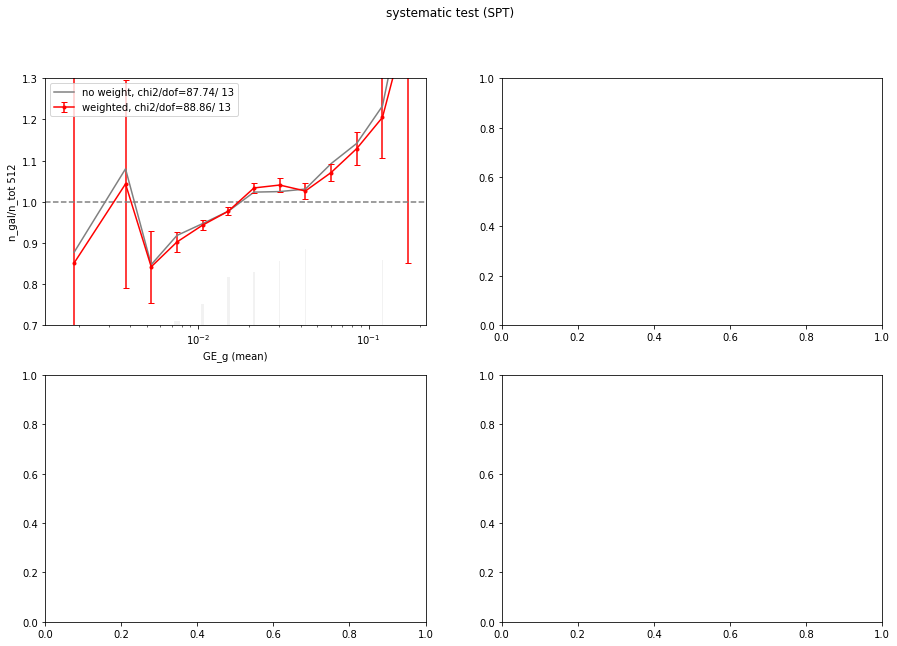

In [129]:
from systematics_module.contCorrection import plot_sysweight
plot_sysweight(property = 'GE', nside = 1024, kind = 'SPT', 
           suffix1='no_weight', suffix2=suffix, inputdir1 = inputdir, inputdir2 = inputdir, outdir=figoutdir)

saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/comparison_systematic_DEPTH_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.png
saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/comparison_systematic_EXPTIME_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.png
saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/comparison_systematic_AIRMASS_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.png
saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/comparison_systematic_SKYBRITE_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.png
saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/comparison_systematic_FWHM_SPT_wg_fwhm_r_ai

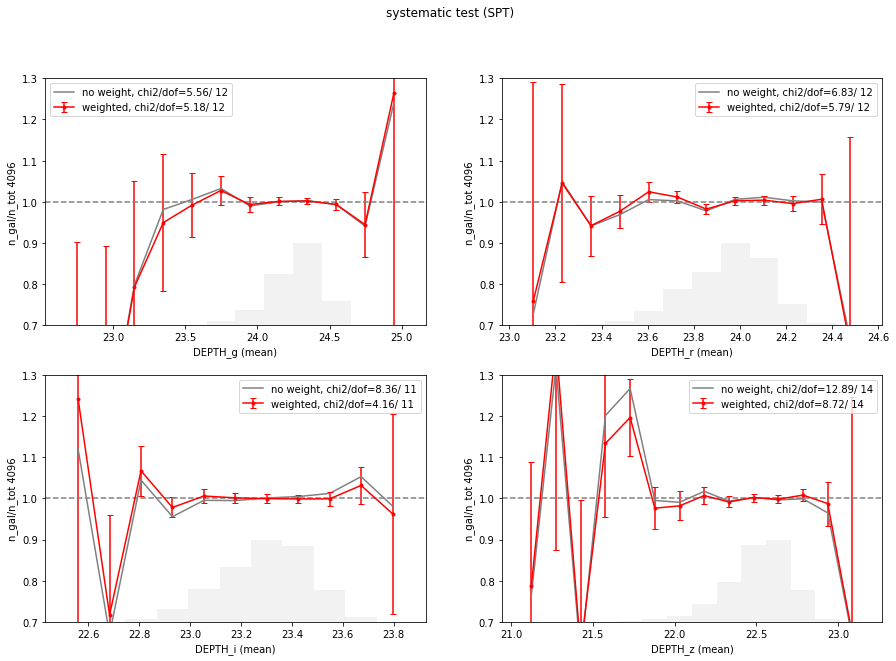

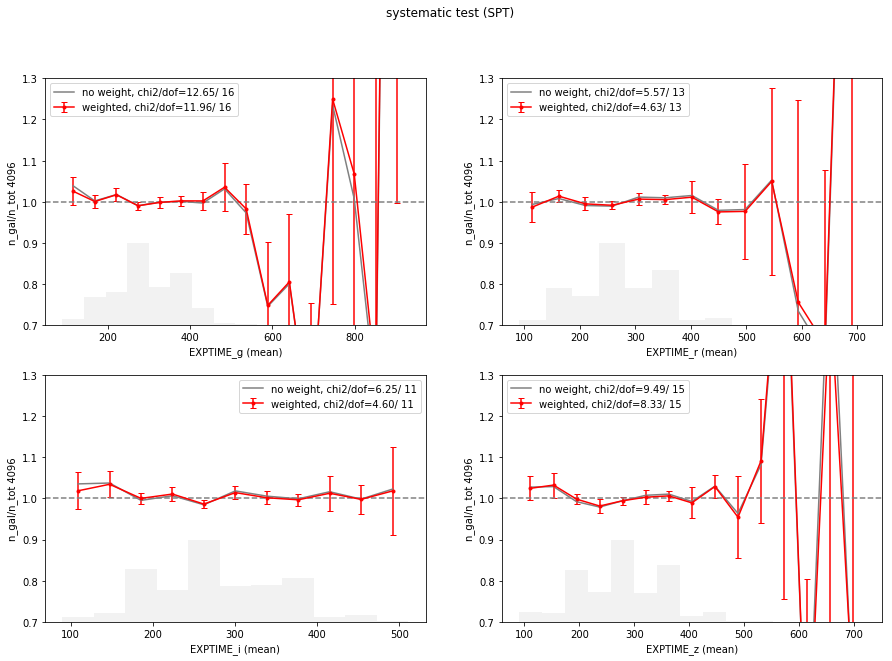

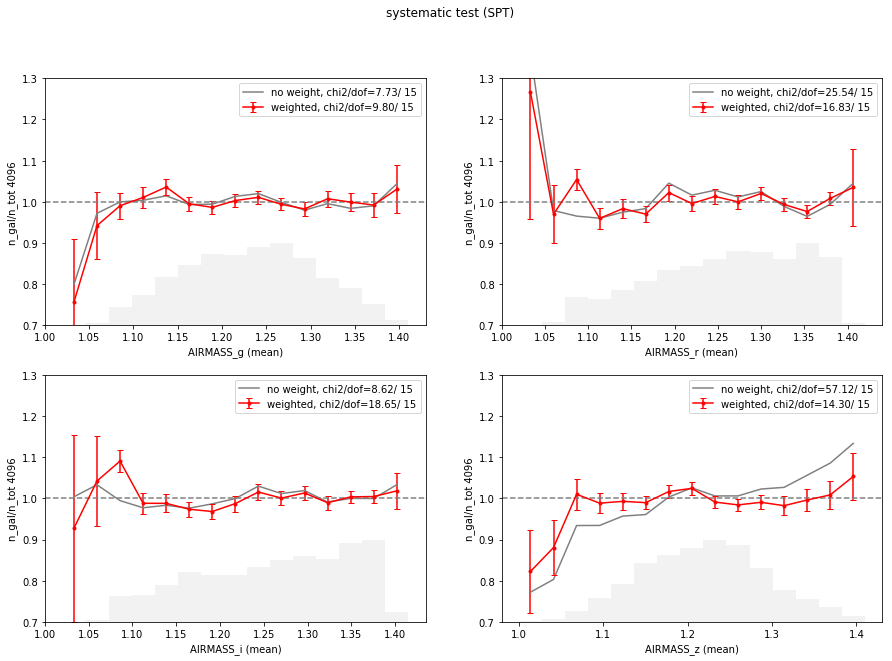

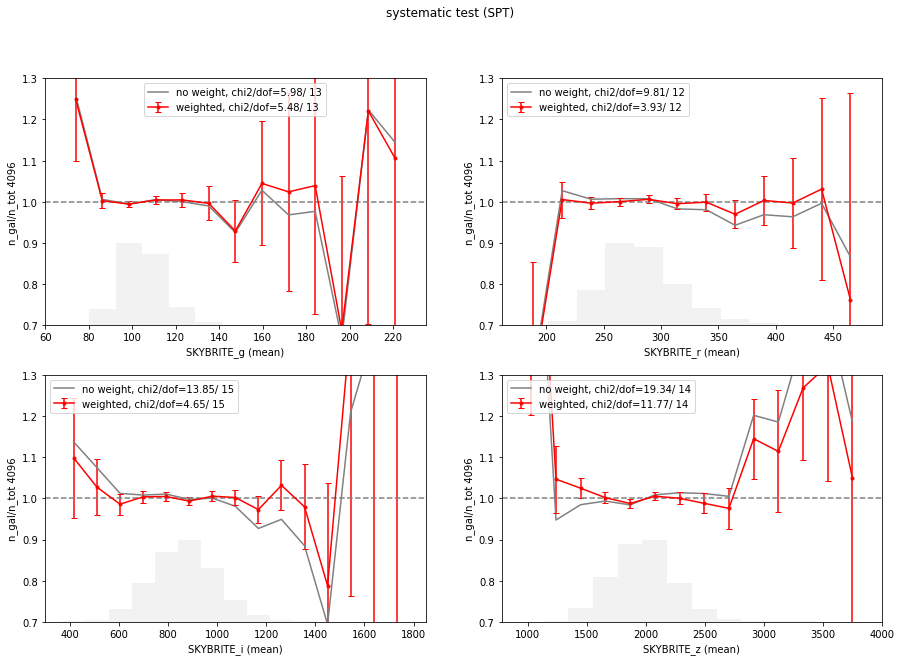

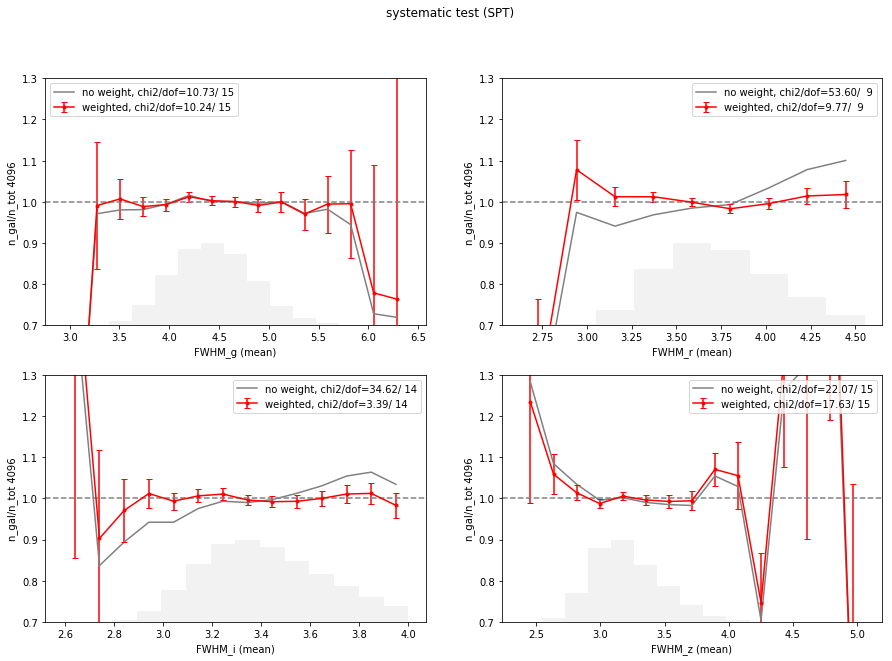

In [191]:
from systematics_module.contCorrection import plot_sysweight
for pr in properties:
    plot_sysweight(property = pr, nside = 4096, kind = 'SPT', 
               suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=figoutdir)



saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/comparison_systematic_GE_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.png


0

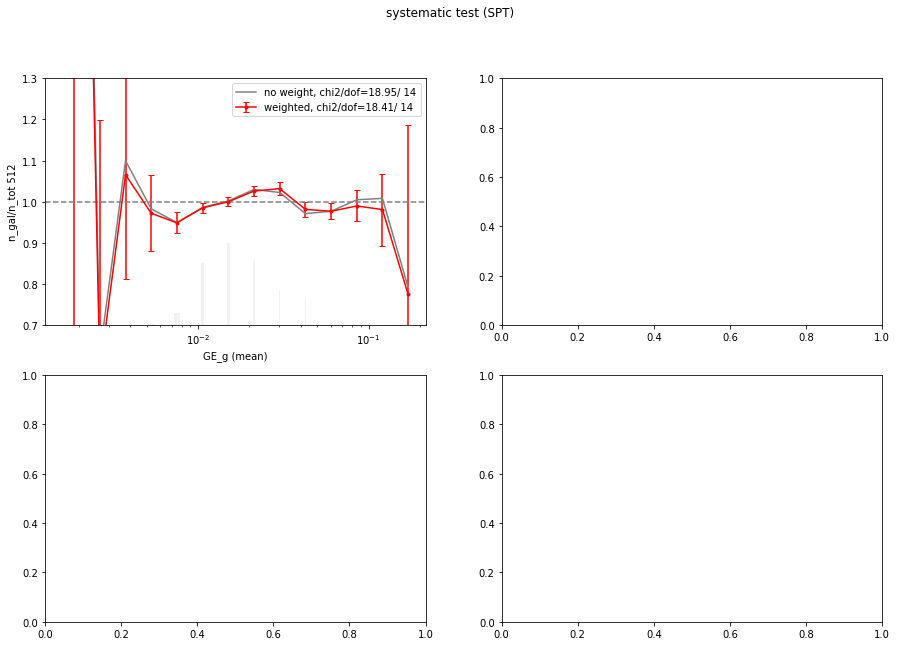

In [164]:
plot_sysweight(property = 'GE', nside = 4096, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=figoutdir)

saving fig to  ../output/sfd_train_photo_SamPle_full2//figure/comparison_systematic_NSTARS_allband_SPT_wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g.png


0

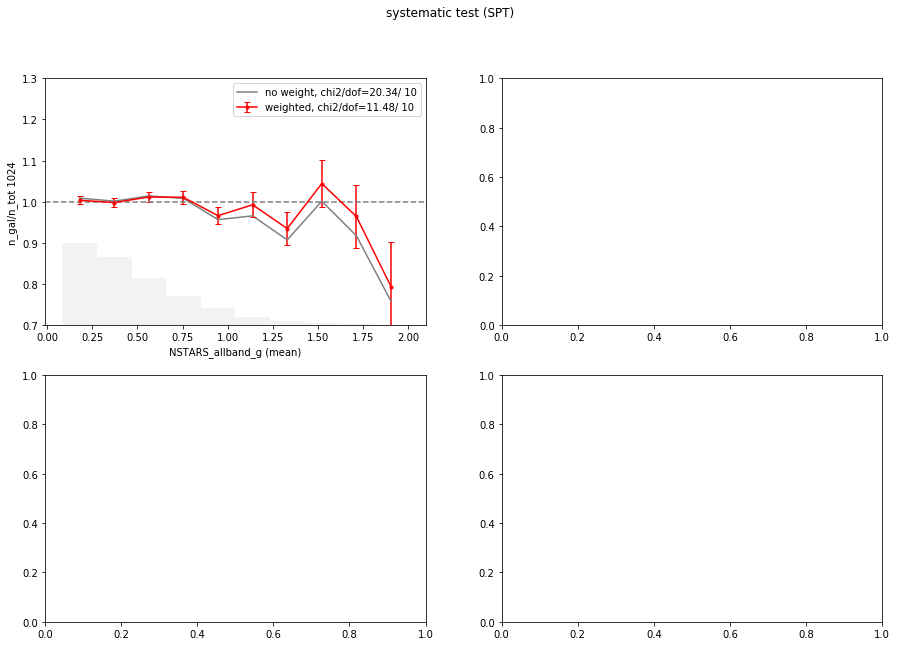

In [170]:
plot_sysweight(property = 'NSTARS_allband', nside = 4096, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=figoutdir)

In [176]:
weightslist = [fitsio.read(wdir+'wg_'+o+'_SPT.fits') for o in order]
all_weight = np.ones(weightslist[0].size)

In [ ]:
#tree corr
from systematics_module.corr import angular_correlation
basedir = inputdir+'/act/'
os.system('mkdir '+inputdir+'/act/')
angular_correlation(data = dmass, rand = rand2, nbins=10, weight = None, njack = 100, 
                        suffix = '_dmass_no_weight_nbins10_jk100', dir = basedir)

angular_correlation(data = dmass_masked, rand = rand2_masked, nbins=10, weight = None, njack = 100, 
                        suffix = '_dmass_vetoed_nbins10_jk100', dir = basedir)

for i in range(1,len(weightslist)+1):
    weight_com = np.ones(weightslist[0].size)
    for w in weightslist[:i]: weight_com *= w
    print i, order[i-1]
    
    angular_correlation(data = dmass_masked, rand = rand2_masked, nbins=10, weight = weight_com, njack = 100, 
                        suffix = '_dmass_weight'+str(i)+'_nbins10_jk100', dir = basedir)

calculate angular correlation function
X (1000, 2)  centers (100, 2)  tol=1e-05  maxiter=200
11 iterations  cluster sizes: [ 9  8  6 11  8  4  5  9 10  8 10 15  5 13 11 14  5  8  7 15  9 13  8  7
 15  6  7  6  8  7  6  7 16  7  7 11 12  7  9 10  9 17  8  6 13 14  3  6
 18 10 10  8  4 12  4 21  7 18  4 13 10 16  8 13 16 12 15  3 14  9 26  7
 11  9 13 11 12 11  7 11  9 17  5 10  9 10  5  7 11 13  7 11 25  3  7 16
 14  8  6  9]
X (113084, 2)  centers (100, 2)  tol=1e-05  maxiter=200
86 iterations  cluster sizes: [1025  859 1016 1279  930  850 1191 1285 1179  969  970 1248 1013 1345
 1204 1249  997 1135 1171 1167  882 1878 1031  879 1066 1176 1115 1296
 1319 1123 1170 1071 1169 1313 1020 1400 1175  710 1217 1152 1083 1193
 1077  767  898 1496  892  710 1438 1224 1238 1453 1235 1263 1351 1181
 1212 1346 1053 1159 1343 1279 1170 1397 1384  848 1146  864  866 1027
 1547  850 1472 1163 1006 1196 1385 1006  678 1060 1330 1171  976  749
 1145  987  745 1372 1509 1260  892 1258 1240  709 1181 116

In [ ]:
ls ../output/sfd_train_photo_SamPle_full2/act/

In [186]:
from systematics import brel_chisqr_fitting
import scipy

err db, db / br1, brmin, br2 : 0.04091257643167745 -0.036629391045075455 0.9613453265957003 0.9820146997749651 1.0022579030273777
err db, db / br1, brmin, br2 : 0.03564549518014726 -0.015419555024221765 0.9743663982176289 0.9923492083890015 1.0100118933977762
err db, db / br1, brmin, br2 : 0.04075559782059124 -0.03494162296613634 0.9622604580038648 0.9828291767332346 1.003016055824456
err db, db / br1, brmin, br2 : 0.043206467592087905 -0.029485217893895133 0.9636315256068725 0.985471577898708 1.0068379931989604
err db, db / br1, brmin, br2 : 0.03767613872856912 -0.01615688868012466 0.9729693386056795 0.9919862939383146 1.0106454773342486
err db, db / br1, brmin, br2 : 0.03995898399047482 -0.04419121242320623 0.958218992051058 0.9783820553798285 0.9981779760415328
err db, db / br1, brmin, br2 : 0.037765848702393856 -0.02316074472619789 0.9695091487953683 0.9885521974531329 1.0072749974977622
err db, db / br1, brmin, br2 : 0.0407160619707313 -0.04112236650400769 0.9593039418299928 0.979

/n/home00/lee.5922/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


pic save to  ../output/sfd_train_photo_SamPle_full2//figure/sys_bias_weight.png


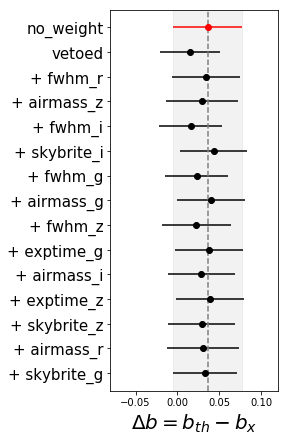

In [188]:


theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
#theory_sgc_interp = theory_sgc_interp(meanr)

fig, ax = plt.subplots(figsize = (3,7))
brelsqr = np.linspace(0.8, 1.2, 5000) 
b_n = 2.0
brelarr = np.sqrt(brelsqr)
dbarray = b_n*(1-brelarr)

labels_SP = ['no_weight', 'vetoed'] + ['+ '+o for o in order ]

filenames = [ basedir+ 'acf_auto_dmass_no_weight_nbins10_jk100.txt', \
              basedir + 'acf_auto_dmass_vetoed_nbins10_jk100.txt'] +\
[ basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt' for j in range(1, len(labels_SP))]

covnames = [ basedir+ 'acf_auto_dmass_no_weight_nbins10_jk100.cov', \
              basedir + 'acf_auto_dmass_vetoed_nbins10_jk100.cov'] +\
[ basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov' for j in range(1, len(labels_SP))]


for j in range(1, len(labels_SP)+1):
    
    meanrw, xiw, xi_errw = np.loadtxt( filenames[j-1], unpack=True)
    cov_dmass_w = np.loadtxt( covnames[j-1], unpack=True)
    #meanrw, xiw, xi_errw = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt', unpack=True)
    #cov_dmass_w = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov', unpack=True)
    HFd = 1.0 #HF(100, 10)
    F_d = HFd * np.linalg.inv(cov_dmass_w)
    err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, theory_sgc_interp(meanrw), F_d, verbose=True)
    if j == 1 : 
        color = 'red'
        ax.axvspan(2.-2*brelw - err_brelw*2., 2.-2*brelw + err_brelw*2.,  alpha=0.1, color='grey')
        ax.axvline(x=2.-2*brelw, color = 'grey', ls='--')
    else : color = 'k'  
        
    ax.errorbar(2.-2*brelw, len(labels_SP)+1-j, xerr =err_brelw*2., fmt='-o', color=color)
    
ax.set_xlabel(r'$\Delta b = b_{th} - b_x$', fontsize = 20)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
ax.set_xlim(-0.1+0.02, 0.1+0.02)
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticks(np.arange(1, len(labels_SP)+1 ))

labels = labels_SP[::-1]
ax.set_yticklabels( labels, fontsize = 15) 
fig.savefig(figoutdir + 'sys_bias_weight.png')
print 'pic save to ', figoutdir + 'sys_bias_weight.png'



